In [55]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import glob, os 

all_files = glob.glob("/Users/sunitakoppar/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports" + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, parse_dates=True, header=0)
    li.append(df)
df = pd.concat(li, axis=0)


In [56]:
df.isnull().sum()

Province/State         246911
Country/Region         243652
Last Update            243652
Confirmed                  19
Deaths                    441
Recovered                 388
FIPS                    32618
Admin2                  32008
Province_State          21177
Country_Region           7617
Last_Update              7617
Lat                     11839
Long_                   11839
Active                   7617
Combined_Key             7617
Latitude               246470
Longitude              246470
Incidence_Rate         223033
Case-Fatality_Ratio    222911
dtype: int64

In [57]:
X=df[['Country/Region','Confirmed','Deaths','Recovered']]
Y=df[['Deaths','Recovered']]

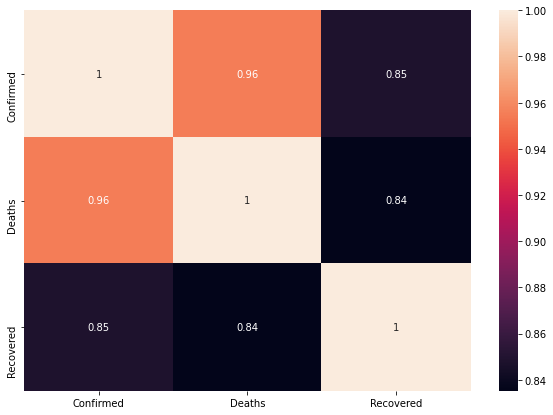

In [44]:
plt.figure(figsize=(10,7))
sns.heatmap(X.corr(),annot=True)
plt.show()

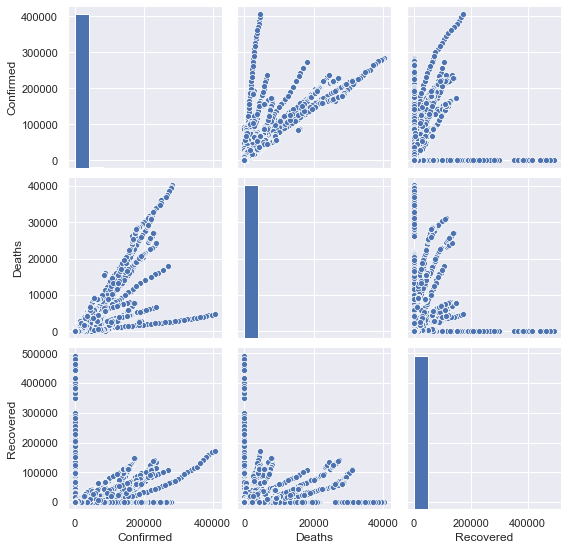

In [58]:
sns.pairplot(X)

In [31]:
from matplotlib.colors import ListedColormap

In [35]:
#the below few cells use csse_covid_19_daily_reports data. Later on I switched the dataset to use us reports
df["Country/Region"].unique()

array(['Mainland China', 'South Korea', 'Others', 'Italy', 'Japan',
       'Iran', 'Singapore', 'Hong Kong', 'US', 'Thailand', 'Bahrain',
       'Taiwan', 'Germany', 'Kuwait', 'Malaysia', 'France', 'Vietnam',
       'Spain', 'UK', 'United Arab Emirates', 'Macau', 'Australia',
       'Canada', 'Iraq', 'Oman', 'Croatia', 'India', 'Philippines',
       'Austria', 'Finland', 'Israel', 'Lebanon', 'Pakistan', 'Russia',
       'Sweden', 'Afghanistan', 'Algeria', 'Belgium', 'Brazil',
       'Cambodia', 'Egypt', 'Georgia', 'Greece', 'Nepal',
       'North Macedonia', 'Norway', 'Romania', 'Sri Lanka', 'Switzerland',
       'Denmark', 'Estonia', 'Netherlands', 'San Marino',
       'Iran (Islamic Republic of)', 'Republic of Korea', 'Hong Kong SAR',
       'Iceland', 'Taipei and environs', 'Czech Republic', 'Portugal',
       'Ireland', 'Slovenia', 'Viet Nam', 'Indonesia',
       'occupied Palestinian territory', 'Qatar', 'Poland',
       'Saudi Arabia', 'Argentina', 'Ecuador', 'Chile', 'Azerbaijan

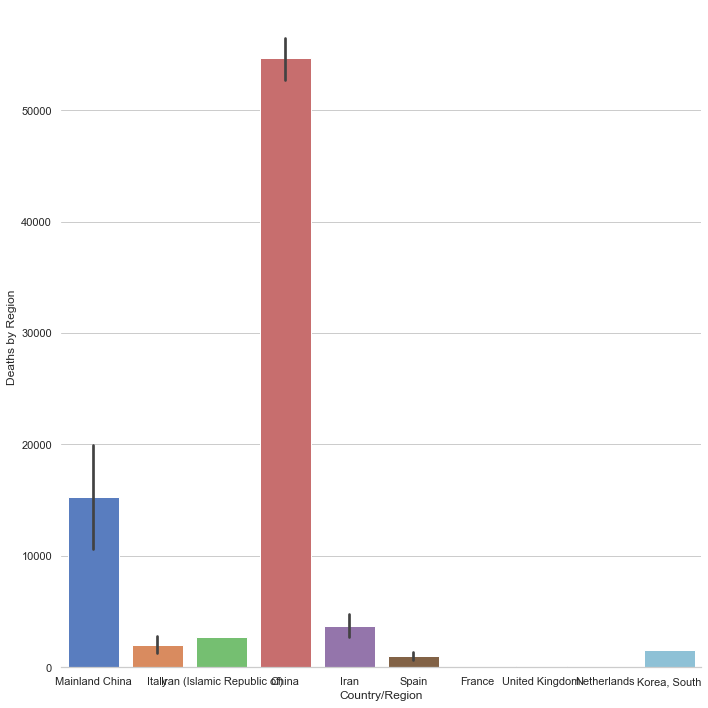

In [59]:
sns.set(style="whitegrid")

# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="Country/Region", y="Recovered",  data=df[df['Deaths']>100],
                height=10, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Deaths by Region")

In [136]:
df.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending=False)

Country/Region
Mainland China    2058658.0
China              765031.0
France              78284.0
US                  50294.0
United Kingdom      20089.0
Netherlands         14254.0
Denmark              1326.0
Name: Confirmed, dtype: float64

In [60]:
import datetime
df['month']=pd.DatetimeIndex(df['Last Update']).month
df['year']=pd.DatetimeIndex(df['Last Update']).year
sns.set(rc={'figure.figsize':(11, 4)})
plt.show()

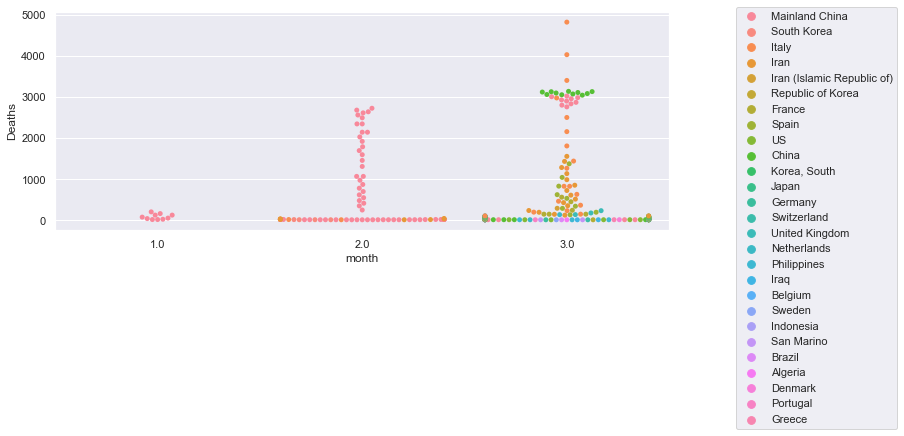

In [61]:
# g = sns.factorplot("month", "Deaths", "Recovered", data=df[df['Deaths']>1000], kind="bar", size=3, palette="muted", legend=True)
# # Set the `yscale`
# g.set(yscale="log")
# # Show plot
fig = plt.figure()
ax = plt.subplot(111)
sns.swarmplot(x="month", y="Deaths",hue="Country/Region", data=df[df['Deaths']>10])
ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

In [7]:
import plotly.express as pdf.groupby('Country/Region')['Recovered'].sum().sort_values(ascending=False)

Country/Region
Mainland China    899639.0
China             741539.0
Iran               61336.0
Italy              36906.0
Korea, South       10855.0
                    ...   
Montenegro             0.0
Namibia                0.0
New Zealand            0.0
Nicaragua              0.0
 Azerbaijan            0.0
Name: Recovered, Length: 210, dtype: float64

In [35]:
import plotly.express as px
df1=df[df['Country/Region']=='US']
total_confirmed = df1.groupby('Last Update')['Confirmed'].sum()

In [37]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df1['Last Update'], y=total_confirmed,mode='lines+markers'))
fig.show()

Lets use the lookup data to gain further insights into the data. Since FIPS is relevant to US only, its a unique identifier for Counties within US, we will filter out for US data only

In [2]:
import folium
from folium import plugins
import plotly
import plotly.graph_objs as go

In [63]:
all_files = glob.glob("/Users/sunitakoppar/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports_us" + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, parse_dates=True, header=0)
    li.append(df)
df2 = pd.concat(li, axis=0)

lookup_df=pd.read_csv("/Users/sunitakoppar/COVID-19/csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv")
usdf = df2.join(lookup_df,on='FIPS',how='inner',rsuffix='_lkp')
usdf.info()
usdf.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3081 entries, 0 to 12
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        3081 non-null   object 
 1   Country_Region        3081 non-null   object 
 2   Last_Update           3072 non-null   object 
 3   Lat                   3079 non-null   float64
 4   Long_                 3079 non-null   float64
 5   Confirmed             3081 non-null   int64  
 6   Deaths                3081 non-null   int64  
 7   Recovered             2222 non-null   float64
 8   Active                3064 non-null   float64
 9   FIPS                  3081 non-null   float64
 10  Incident_Rate         3079 non-null   float64
 11  People_Tested         3079 non-null   float64
 12  People_Hospitalized   2089 non-null   float64
 13  Mortality_Rate        3026 non-null   float64
 14  UID                   3081 non-null   int64  
 15  ISO3                  3

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,...,iso3,code3,FIPS_lkp,Admin2,Province_State_lkp,Country_Region_lkp,Lat_lkp,Long__lkp,Combined_Key,Population
0,Alabama,US,2020-05-02 02:32:31,32.3182,-86.9023,7294,289,0.0,7005.0,1.0,...,ALB,8.0,NaN,NaN,NaN,Albania,41.1533,20.1683,Albania,2877800.0
0,Alabama,US,2020-05-24 02:32:48,32.3182,-86.9023,14117,549,7951.0,5617.0,1.0,...,ALB,8.0,NaN,NaN,NaN,Albania,41.1533,20.1683,Albania,2877800.0
0,Alabama,US,2020-05-23 02:32:47,32.3182,-86.9023,13670,541,7951.0,5178.0,1.0,...,ALB,8.0,NaN,NaN,NaN,Albania,41.1533,20.1683,Albania,2877800.0
0,Alabama,US,2020-04-21 23:40:34,32.3182,-86.9023,5317,183,NaN,5134.0,1.0,...,ALB,8.0,NaN,NaN,NaN,Albania,41.1533,20.1683,Albania,2877800.0
0,Alabama,US,2020-04-20 23:36:47,32.3182,-86.9023,5079,163,NaN,4916.0,1.0,...,ALB,8.0,NaN,NaN,NaN,Albania,41.1533,20.1683,Albania,2877800.0
0,Alabama,US,2020-05-30 02:32:55,32.3182,-86.9023,17031,610,9355.0,7066.0,1.0,...,ALB,8.0,NaN,NaN,NaN,Albania,41.1533,20.1683,Albania,2877800.0
0,Alabama,US,2020-05-29 02:32:58,32.3182,-86.9023,16530,591,9355.0,6584.0,1.0,...,ALB,8.0,NaN,NaN,NaN,Albania,41.1533,20.1683,Albania,2877800.0
0,Alabama,US,2020-04-15 22:56:51,32.3182,-86.9023,4075,118,NaN,3957.0,1.0,...,ALB,8.0,NaN,NaN,NaN,Albania,41.1533,20.1683,Albania,2877800.0
0,Alabama,US,2020-04-14 23:33:31,32.3182,-86.9023,3953,114,NaN,3839.0,1.0,...,ALB,8.0,NaN,NaN,NaN,Albania,41.1533,20.1683,Albania,2877800.0
0,Alabama,US,2020-05-18 02:32:26,32.3182,-86.9023,11771,488,NaN,11283.0,1.0,...,ALB,8.0,NaN,NaN,NaN,Albania,41.1533,20.1683,Albania,2877800.0


In [68]:
fig = go.Figure()
fig = px.line(usdf, x="Last_Update", y="Confirmed", color='Province_State')
fig.show()


In [78]:
m = folium.Map(location=[37, -102], zoom_start=4,tiles='Stamenterrain')
us_latlong=usdf[(usdf['Lat'].notnull()) & (usdf['Deaths']>0)]
for lat, lon, val, name in zip(us_latlong['Lat'],us_latlong['Long_'],us_latlong['Deaths'],us_latlong['Province_State']):
    folium.CircleMarker([lat,lon],radius=val*0.8,popup=str(name).capitalize())
    
m

Creating an SIR model for COVID Analysis:


In [82]:
#Lets plot the population of Each States and focus on 2 states to work on SIR model
lookup_df=lookup_df[lookup_df['Province_State'].notnull()]
lookup_df[['Province_State','Population']].head(50)

,Province_State,Population
23,Acre,881935.0
24,Alagoas,3337357.0
25,Amapa,845731.0
26,Amazonas,4144597.0
27,Bahia,14873064.0
28,Ceara,9132078.0
29,Distrito Federal,3015268.0
30,Espirito Santo,4018650.0
31,Goias,7018354.0
32,Maranhao,7075181.0


###) Lets explore using the timeseries dataset now:

In [83]:
us_deaths_ts = pd.read_csv("/Users/sunitakoppar/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv")
us_conf_ts = pd.read_csv("/Users/sunitakoppar/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv")
us_recv_ts = pd.read_csv("/Users/sunitakoppar/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv")
gl_deaths_ts = pd.read_csv("/Users/sunitakoppar/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
gl_conf_ts = pd.read_csv("/Users/sunitakoppar/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
gl_recv_ts = pd.read_csv("/Users/sunitakoppar/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

us_deaths_ts.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0.0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,5,5,5,5,5,5,5,5,5,5.0
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,2,2,2,2,2,2,2,16,16,16.0
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,129,131,132,133,136,136,138,140,140,141.0
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,6,6,6,6,6,6,6,6,6,6.0


In [84]:
gl_deaths_ts.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,227,235,246,249,257,265,270,294,300,309
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,33,33,33,33,33,33,33,33,33,33
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,623,630,638,646,653,661,667,673,681,690
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,51
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4


In [ ]:
### As is evident from all the above exploration that we have 2 different schemas here. One for US and another for global.
The lookup dataset needs to be joined with US timeseries dataset on FIPS and with global datasets on Latitude and Longitude

In [96]:
us_d_ts = pd.melt(us_deaths_ts, id_vars=['UID','iso2','iso3','code3','FIPS','Admin2','Province_State','Country_Region','Lat','Long_'],var_name='date')
us_d_ts.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,date,value
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,Combined_Key,"American Samoa, US"
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,Combined_Key,"Guam, US"
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,Combined_Key,"Northern Mariana Islands, US"
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,Combined_Key,"Puerto Rico, US"
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,Combined_Key,"Virgin Islands, US"


In [112]:
gl_c_ts= gl_conf_ts.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],var_name='Date',value_name='Confirmed')
gl_c_ts

,Province/State,Country/Region,Lat,Long,Date,Confirmed
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
36171,NaN,Sao Tome and Principe,0.186360,6.613081,6/5/20,499
36172,NaN,Yemen,15.552727,48.516388,6/5/20,469
36173,NaN,Comoros,-11.645500,43.333300,6/5/20,132
36174,NaN,Tajikistan,38.861034,71.276093,6/5/20,4370


In [116]:
gl_d_ts= gl_deaths_ts.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],var_name='Date',value_name='Deaths')
gl_r_ts = gl_recv_ts.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],var_name='Date',value_name='Recovered')
gl_r_ts.tail()

,Province/State,Country/Region,Lat,Long,Date,Recovered
34403,NaN,Sao Tome and Principe,0.186360,6.613081,6/5/20,68
34404,NaN,Yemen,15.552727,48.516388,6/5/20,23
34405,NaN,Comoros,-11.645500,43.333300,6/5/20,55
34406,NaN,Tajikistan,38.861034,71.276093,6/5/20,2491
34407,NaN,Lesotho,-29.609988,28.233608,6/5/20,2


In [ ]:
Referring to SIR Model, 
By definition
S(t) are those susceptible but not yet infected with the disease
In our dataset the confirmed cases can be sort of mapped to susceptible. In the sense susceptible to death

I(t) is the number of infectious individuals;
Active cases can all be considered to belong to this category

R(t) are those individuals who have recovered from the disease and now have immunity to it.
Both Recovered and Death cases are sort of in this category for this analysis

In [117]:
ts1=pd.merge(gl_c_ts, gl_d_ts, on=['Province/State','Country/Region','Lat','Long','Date'],how='inner' )
ts1

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0,0
...,...,...,...,...,...,...,...
36171,NaN,Sao Tome and Principe,0.186360,6.613081,6/5/20,499,12
36172,NaN,Yemen,15.552727,48.516388,6/5/20,469,111
36173,NaN,Comoros,-11.645500,43.333300,6/5/20,132,2
36174,NaN,Tajikistan,38.861034,71.276093,6/5/20,4370,48


In [118]:
gl_ts=pd.merge(ts1, gl_r_ts, on=['Province/State','Country/Region','Lat','Long','Date'],how='inner' )
gl_ts

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0,0,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0,0,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0,0,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0,0,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0,0,0
...,...,...,...,...,...,...,...,...
32363,Saint Pierre and Miquelon,France,46.885200,-56.315900,6/5/20,1,0,1
32364,NaN,Western Sahara,24.215500,-12.885800,6/5/20,9,1,6
32365,NaN,Sao Tome and Principe,0.186360,6.613081,6/5/20,499,12,68
32366,NaN,Comoros,-11.645500,43.333300,6/5/20,132,2,55


In [119]:
gl_ts['Active'] = gl_ts['Confirmed'] - (gl_ts['Deaths'] + gl_ts['Recovered'])
gl_ts

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0,0,0,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0,0,0,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0,0,0,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0,0,0,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0,0,0,0
...,...,...,...,...,...,...,...,...,...
32363,Saint Pierre and Miquelon,France,46.885200,-56.315900,6/5/20,1,0,1,0
32364,NaN,Western Sahara,24.215500,-12.885800,6/5/20,9,1,6,2
32365,NaN,Sao Tome and Principe,0.186360,6.613081,6/5/20,499,12,68,419
32366,NaN,Comoros,-11.645500,43.333300,6/5/20,132,2,55,75


In [122]:
total_cases = gl_ts.groupby('Country/Region')['Active'].sum().sort_values(ascending=False).to_frame()
total_cases.style.background_gradient(cmap='Reds')

,Active
Country/Region,
US,57953736
United Kingdom,10144582
Russia,8087021
Brazil,6651133
Italy,6400111
France,5926352
Spain,5436362
Turkey,3134452
Germany,2715671


In [128]:
## This is supposed to create circles with size of the circle representing the number of active cases

m = folium.Map(location=[37, -102], zoom_start=4,tiles='Stamenterrain')
for lat, lon, val, name in zip(gl_ts['Lat'],gl_ts['Long'],gl_ts['Active'],gl_ts['Country/Region']):
    folium.CircleMarker([lat,lon],radius=val*0.8,popup=('<strong>Country</strong>'+str(name).capitalize()+'<strong>Country</strong>'))
    
m

<ipython-input-133-1d00e190fd42>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



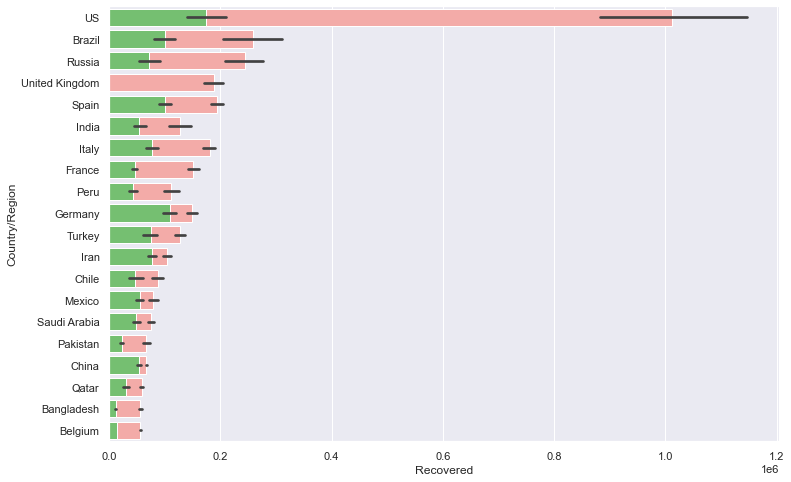

In [133]:
gl_top_ts=gl_ts[gl_ts['Confirmed']>50000]
f,ax=plt.subplots(figsize=(12,8))
data=gl_top_ts[['Country/Region','Confirmed','Deaths','Recovered','Active']]
data.sort_values('Confirmed',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Confirmed",y="Country/Region",data=data, label="Total",color='r')
sns.set_color_codes("muted")
sns.barplot(x="Recovered",y="Country/Region",data=data, label="Recovered",color='g')

Interesting inferences here, though US has highest number of cases, it has high recovery as well.
UK is interestingly lacking recovery cases at all

In [198]:
gl_top_ts = gl_ts[gl_ts['Confirmed']>0]
fig = go.Figure()
us_ts=gl_top_ts[gl_top_ts['Country/Region']=='US']
fig.add_trace(go.Scatter(x=us_ts['Date'],y=us_ts['Confirmed']
                        ,mode='lines+markers',name='Confirmed Time series'
                         ))
fig.update_layout(title_text='Trend for US Confirmed cases')

fig.show()

In [199]:
fig = px.bar(us_ts,x='Date',y='Confirmed',color='Confirmed',
             orientation='v',height=500, title='Confirmed US cases trending (US)'
            ,color_discrete_sequence=px.colors.cyclical.IceFire)
fig.show()

In [200]:
ts = gl_top_ts[gl_top_ts['Country/Region']=='United Kingdom']
fig = px.bar(ts,x='Date',y='Confirmed',color='Confirmed',
             orientation='v',height=500, title='Confirmed cases trending'
            ,color_discrete_sequence=px.colors.cyclical.IceFire)
fig.show()

In [201]:
ts = gl_top_ts[gl_top_ts['Country/Region']=='India']
fig = px.bar(ts,x='Date',y='Confirmed',color='Confirmed',
             orientation='v',height=500, title='Confirmed cases trending'
            ,color_discrete_sequence=px.colors.cyclical.IceFire)
fig.show()

In [202]:
rec = gl_top_ts[gl_top_ts['Country/Region']=='United Kingdom']
fig = px.bar(rec,x='Date',y='Recovered',color='Recovered',
             orientation='v',height=500, title='Recovered cases trending (United Kingdom)'
            ,color_discrete_sequence=px.colors.cyclical.IceFire)
fig.show()

In [203]:
rec = gl_top_ts[gl_top_ts['Country/Region']=='US']
fig = px.bar(rec,x='Date',y='Deaths',color='Deaths',
             orientation='v',height=500, title='Deaths cases trending (US)'
            ,color_discrete_sequence=px.colors.cyclical.IceFire)
fig.show()

Trends after crossing 100 since that is when we actually start noticing the impact


In [211]:
title='Combined trends for Confirmed cases US, United kingdom and India'
colors=['rgb(255,0,0)','rgb(0,255,0)','rgb(40,130,189)']
labels=['US','United Kingdom','India']
usdf=gl_top_ts[gl_top_ts['Country/Region']=='US']
ukdf=gl_top_ts[gl_top_ts['Country/Region']=='United Kingdom']
indf=gl_top_ts[gl_top_ts['Country/Region']=='India']
line_size=[5,2,2]
fig=go.Figure()
fig.add_trace(go.Scatter(x=usdf['Date'],
                        y=usdf['Confirmed'],
                        mode='lines',
                        name=labels[0],
                        line=dict(color=colors[0],
                                 width=line_size[0]),connectgaps=True))
fig.add_trace(go.Scatter(x=ukdf['Date'],
                        y=ukdf['Confirmed'],
                        mode='lines',
                        name=labels[1],
                        line=dict(color=colors[1],width=line_size[1]),
                                 connectgaps=True))
fig.add_trace(go.Scatter(x=indf['Date'],
                        y=indf['Confirmed'],
                        mode='lines',
                        name=labels[2],
                        line=dict(color=colors[2],width=line_size[2]),connectgaps=True))

fig.update_layout(yaxis=dict(title='Number of Cases'))
fig.show()

In [212]:
title='Combined trends for Confirmed cases US, United kingdom and India'
colors=['rgb(255,250,0)','rgb(0,255,0)','rgb(255,0,0)']
labels=['Confirmed','Recovered','Deaths']
tdf=gl_top_ts[gl_top_ts['Country/Region']=='US']
line_size=[5,2,2]
fig=go.Figure()
fig.add_trace(go.Scatter(x=tdf['Date'],
                        y=tdf['Confirmed'],
                        mode='lines',
                        name=labels[0],
                        line=dict(color=colors[0],
                                 width=line_size[0]),connectgaps=True))
fig.add_trace(go.Scatter(x=tdf['Date'],
                        y=tdf['Recovered'],
                        mode='lines',
                        name=labels[1],
                        line=dict(color=colors[1],width=line_size[1]),
                                 connectgaps=True))
fig.add_trace(go.Scatter(x=tdf['Date'],
                        y=tdf['Deaths'],
                        mode='lines',
                        name=labels[2],
                        line=dict(color=colors[2],width=line_size[2]),connectgaps=True))

fig.show()

Trying to forecast using Prophet. Lets predict trends for US

In [213]:
from fbprophet import Prophet

In [215]:
pred_df=usdf=gl_top_ts[gl_top_ts['Country/Region']=='US']
## Now lets get total confirmed,deaths and Recovered cases by date 
confirmed = pred_df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = pred_df.groupby('Date').sum()['Deaths'].reset_index()
recovered = pred_df.groupby('Date').sum()['Recovered'].reset_index()
recovered.tail()

,Date,Recovered
131,6/1/20,458231
132,6/2/20,463868
133,6/3/20,479258
134,6/4/20,485002
135,6/5/20,491706


In [216]:
confirmed.columns=['ds','y']
confirmed['ds']=pd.to_datetime(confirmed['ds'])
confirmed.tail()

,ds,y
131,2020-06-01,1811020
132,2020-06-02,1831821
133,2020-06-03,1851520
134,2020-06-04,1872660
135,2020-06-05,1897380


In [217]:
#Confidence Interval of 0.95 in our prediction
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future=m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
138,2020-06-08
139,2020-06-09
140,2020-06-10
141,2020-06-11
142,2020-06-12


In [219]:
forecast=m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
138,2020-06-08,1.965549e+06,1.957696e+06,1.973359e+06
139,2020-06-09,1.986313e+06,1.976063e+06,1.999042e+06
140,2020-06-10,2.007678e+06,1.993147e+06,2.024335e+06
141,2020-06-11,2.030832e+06,2.011336e+06,2.051430e+06
142,2020-06-12,2.054307e+06,2.029583e+06,2.079590e+06


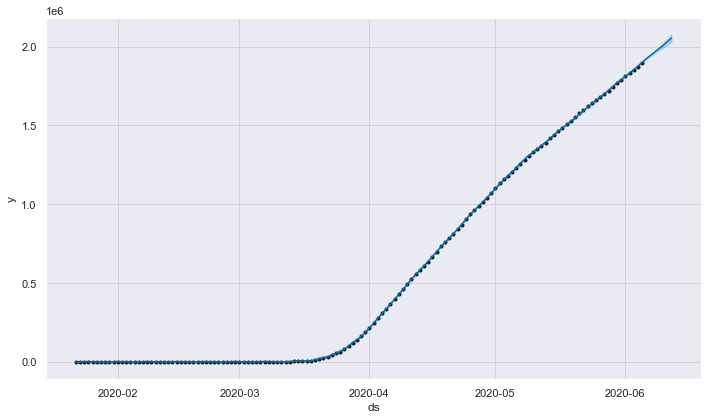

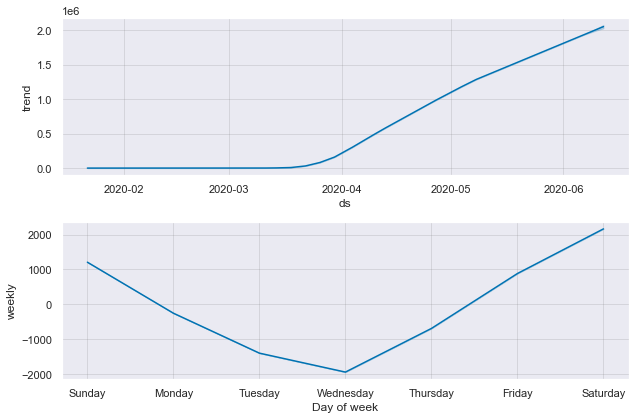

In [220]:
confirmed_forecast_plot = m.plot(forecast)
confirmed_forecast_plot = m.plot_components(forecast)

In [ ]:
m1 = Prophet(mcmc_samples=3, growth='linear', interval_width=0.95)
m1.fit(confirmed)
future=m1.make_future_dataframe(periods=7)
future.tail()
forecast=m1.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
confirmed_forecast_plot = m1.plot(forecast)
confirmed_forecast_plot = m1.plot_components(forecast)